This file is about evaluating diffrent models to find the best segmentation for our model

In [1]:
from transformers import pipeline
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
import evaluation

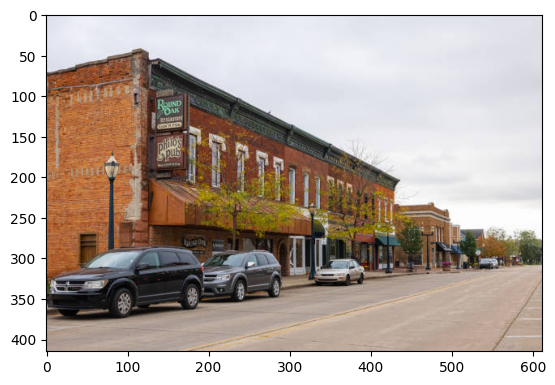

In [2]:
#Load Image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"
image = Image.open(requests.get(url, stream=True).raw)

plt.imshow(image)

Get prediction masks

In [3]:
#Instance Segmentation
instance_segmentation = pipeline("image-segmentation", "facebook/mask2former-swin-large-cityscapes-instance", device='cuda')
results = instance_segmentation(image)
print(results)
nb_mask = len(results)

c:\Users\onurb\anaconda3\envs\cuda\Lib\site-packages\transformers\utils\deprecation.py:165: UserWarning: The following named arguments are not valid for `Mask2FormerImageProcessor.__init__` and were ignored: '_max_size'
  return func(*args, **kwargs)
`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999944, 'label': 'car', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x2129AE00210>}, {'score': 0.999945, 'label': 'car', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x2129AE00190>}, {'score': 0.999653, 'label': 'car', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x2129AE00610>}, {'score': 0.903578, 'label': 'person', 'mask': <PIL.Image.Image image mode=L size=612x415 at 0x2129AE00450>}]


In [4]:
masks = [np.array(results[i]["mask"]) for i in range(nb_mask)]

Get ground truth masks

In [29]:
label_png = "..\\Image_Segmentation\\labels\\street\\label.png" #this is generated by lableme

lbl = np.asarray(Image.open(label_png))
nb_labels = np.max(np.unique(lbl))
gt_masks = [np.where(lbl == i, 1, 0) for i in range(1,nb_labels+1)]

In [30]:
#evaluate the model
ious = evaluation.get_ious_from_masks(masks, gt_masks)

for i in range(len(ious)):
    print(f"the max ious of mask {i} is: {ious[i][1]} with iou = {ious[i][0]}")

the max ious of mask 0 is: 0 with iou = 0.1461887306734339
the max ious of mask 1 is: 1 with iou = 0.4194017094017094
the max ious of mask 2 is: 2 with iou = 0.6690647482014388
the max ious of mask 3 is: 0 with iou = 0


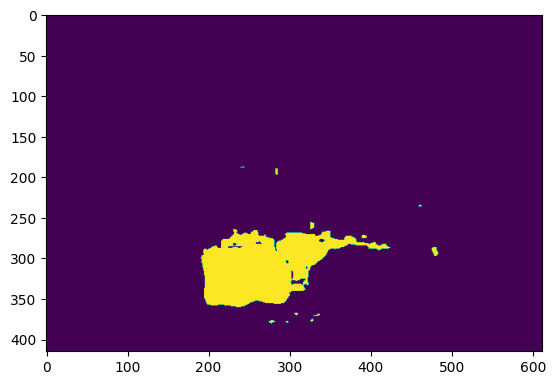

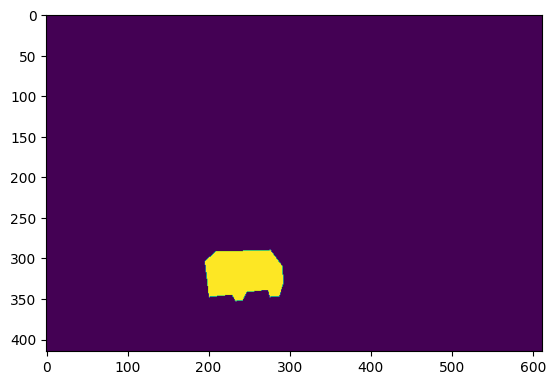

In [40]:
plt.imshow(results[1]["mask"])
plt.show()
plt.imshow(gt_masks[1])